<a href="https://colab.research.google.com/github/AshishGtmMishra/Data-Visualization-Projects/blob/main/1_Alternative_and_Nuclear_energy_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: Alternative and nuclear energy (% of total energy use)

Here we will analyze the dataset, the process will be loading the data, preparing the data, cleaning the data and finally visualize the results and try to draw insights from the visualizations.

In [1]:
import pandas as pd

# Loading the dataset into the dataframe
filepath = '/content/sample_data/Alternative and nuclear energy (% of total energy use).csv'
df_energy = pd.read_csv(filepath)

df_energy.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.763343,2.584831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.814806,0.834197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.546607,2.548840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Albania,ALB,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.068785,24.548050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,AND,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.446661,0.414413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.025763,0.096907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,ARG,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.671430,5.501504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above data is a very difficult dataset since it has so many NaN values, still we will try our best to take insights out of it

In [2]:
# Plot the distribution of alternative and nuclear energy use for the year 2015
# (Since the data is given till 2015)

# Cleaning the data
latest_year = '2015'
df_energy_clean = df_energy.dropna(subset=[latest_year])
df_energy_clean[latest_year] = pd.to_numeric(df_energy_clean[latest_year], errors='coerce')
df_energy_clean.dropna(subset=[latest_year], inplace=True)
df_energy_clean[latest_year] = df_energy_clean[latest_year].astype(float)

<ipython-input-2-5f8531e1246d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_clean[latest_year] = pd.to_numeric(df_energy_clean[latest_year], errors='coerce')
<ipython-input-2-5f8531e1246d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_clean.dropna(subset=[latest_year], inplace=True)
<ipython-input-2-5f8531e1246d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

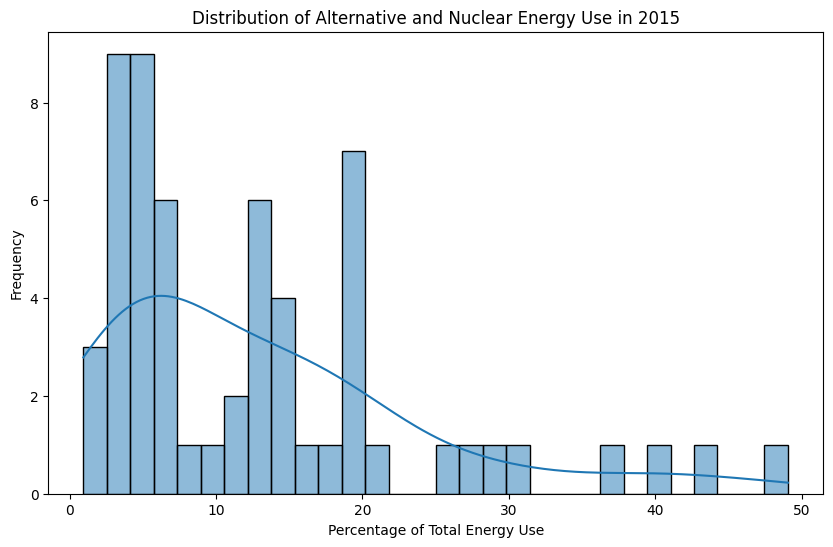

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_energy_clean[latest_year], bins=30, kde=True)
plt.title('Distribution of Alternative and Nuclear Energy Use in 2015')
plt.xlabel('Percentage of Total Energy Use')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of alternative and nuclear energy use as a percentage of total energy use for the year 2015.

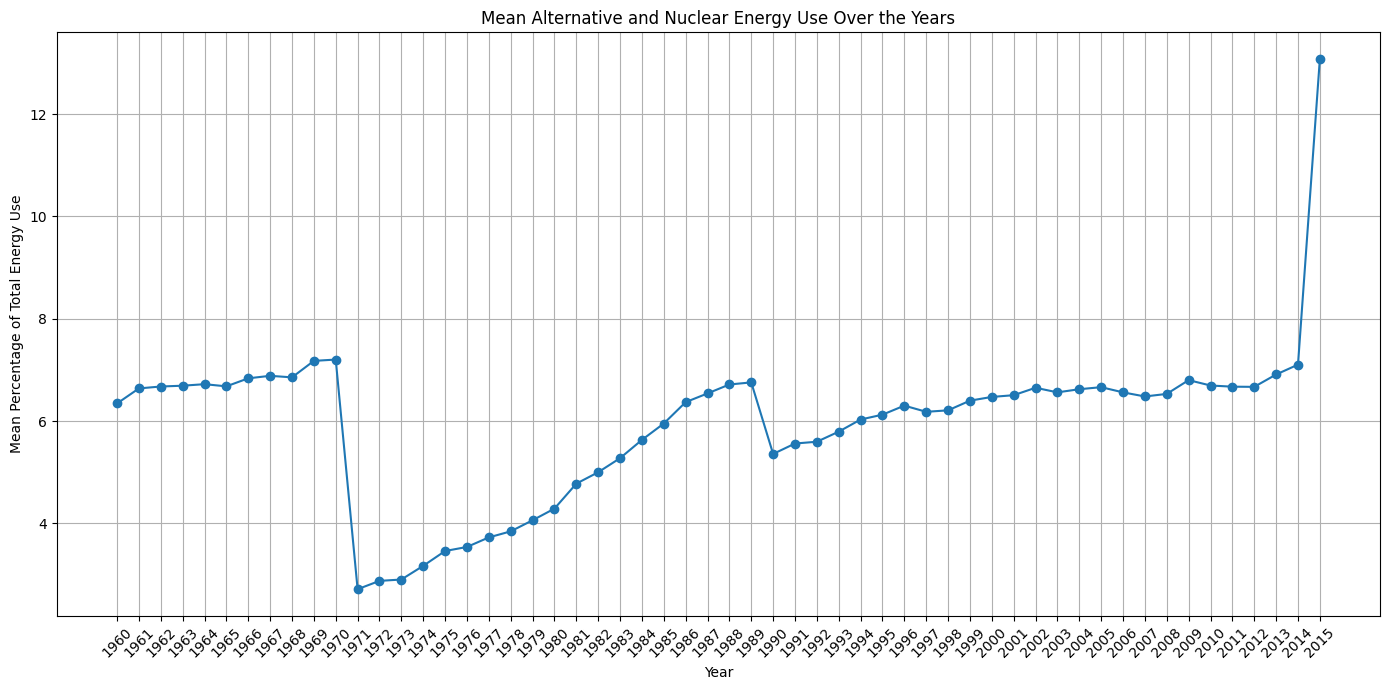

In [4]:
# Plotting the global average the alternative and nuclear energy vs Years
import numpy as np

# Prepare the data for plotting
# Converting all the columns into numeric
year_columns = df_energy.columns[4:]  # Exclude the first few columns which are not years
df_energy_years = df_energy[year_columns].apply(pd.to_numeric, errors='coerce')

mean_energy_use = df_energy_years.mean().dropna()
mean_energy_use.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(mean_energy_use.index, mean_energy_use.values, marker='o')
plt.title('Mean Alternative and Nuclear Energy Use Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Percentage of Total Energy Use')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The following insights can be drawn from the data:

- We can see that there is a sudden growth in nuclear energy in the year 2014, this happened due to the nuclear deal between many nations.

- After the year 2015 data hasn't been maintained but shows positive growth.

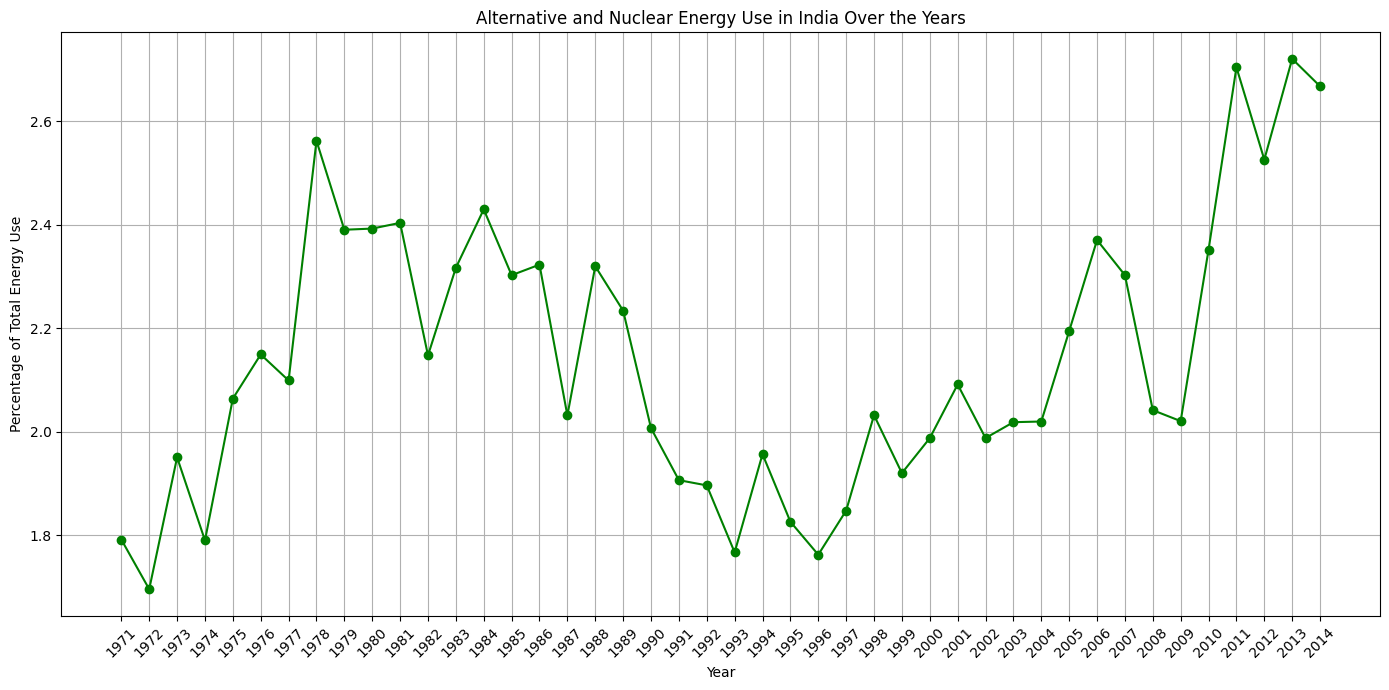

In [5]:
# Plotting the alternative and nuclear energy vs Years for india
india_data = df_energy[df_energy['Country Name'] == 'India']

# Convert all the columns into numeric
# Ignoring the NaN values
india_energy_years = india_data[year_columns].apply(pd.to_numeric, errors='coerce')

india_energy_years = india_energy_years.T   # To have years in index
india_energy_years.columns = ['Percentage']

# Dropping rows with NaN values
india_energy_years.dropna(inplace=True)

#Plotting
plt.figure(figsize=(14, 7))
plt.plot(india_energy_years.index, india_energy_years['Percentage'], marker='o', color='green')
plt.title('Alternative and Nuclear Energy Use in India Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Energy Use')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Plot for Japan, United States, United Kingdom, South Korea, China, Germany. France, Sweden, Russia, Israel.

But some of the countries that are presented might not have continuous data so we have to check that which of the above countries we can plot?

In [6]:
# Selected Countries
selected_countries = ['Japan', 'United States', 'United Kingdom', 'South Korea', 'China', 'Germany', 'France', 'Sweden', 'Russia', 'Israel']

for country in selected_countries:
    country_data = df_energy[df_energy['Country Name'] == country]
    if country_data.empty:
        print(f'Data for {country} is empty.')
    else:
        print(f'Data for {country} is available.')

# hecking if transposing can be done
for country in selected_countries:
    country_data = df_energy[df_energy['Country Name'] == country]
    country_energy_years = country_data[year_columns].apply(pd.to_numeric, errors='coerce').T
    if not country_energy_years.empty:
        print(f'Index after transpose for {country} is correct and data is not empty.')
    else:
        print(f'Issue with index after transpose for {country}.')

Data for Japan is available.
Data for United States is available.
Data for United Kingdom is available.
Data for South Korea is empty.
Data for China is available.
Data for Germany is available.
Data for France is available.
Data for Sweden is available.
Data for Russia is empty.
Data for Israel is available.
Index after transpose for Japan is correct and data is not empty.
Index after transpose for United States is correct and data is not empty.
Index after transpose for United Kingdom is correct and data is not empty.
Issue with index after transpose for South Korea.
Index after transpose for China is correct and data is not empty.
Index after transpose for Germany is correct and data is not empty.
Index after transpose for France is correct and data is not empty.
Index after transpose for Sweden is correct and data is not empty.
Issue with index after transpose for Russia.
Index after transpose for Israel is correct and data is not empty.


The troubleshooting process revealed that data for South Korea and Russia is empty. So, We will proceed with plotting the data for the countries with available data and exclude South Korea and Russia.

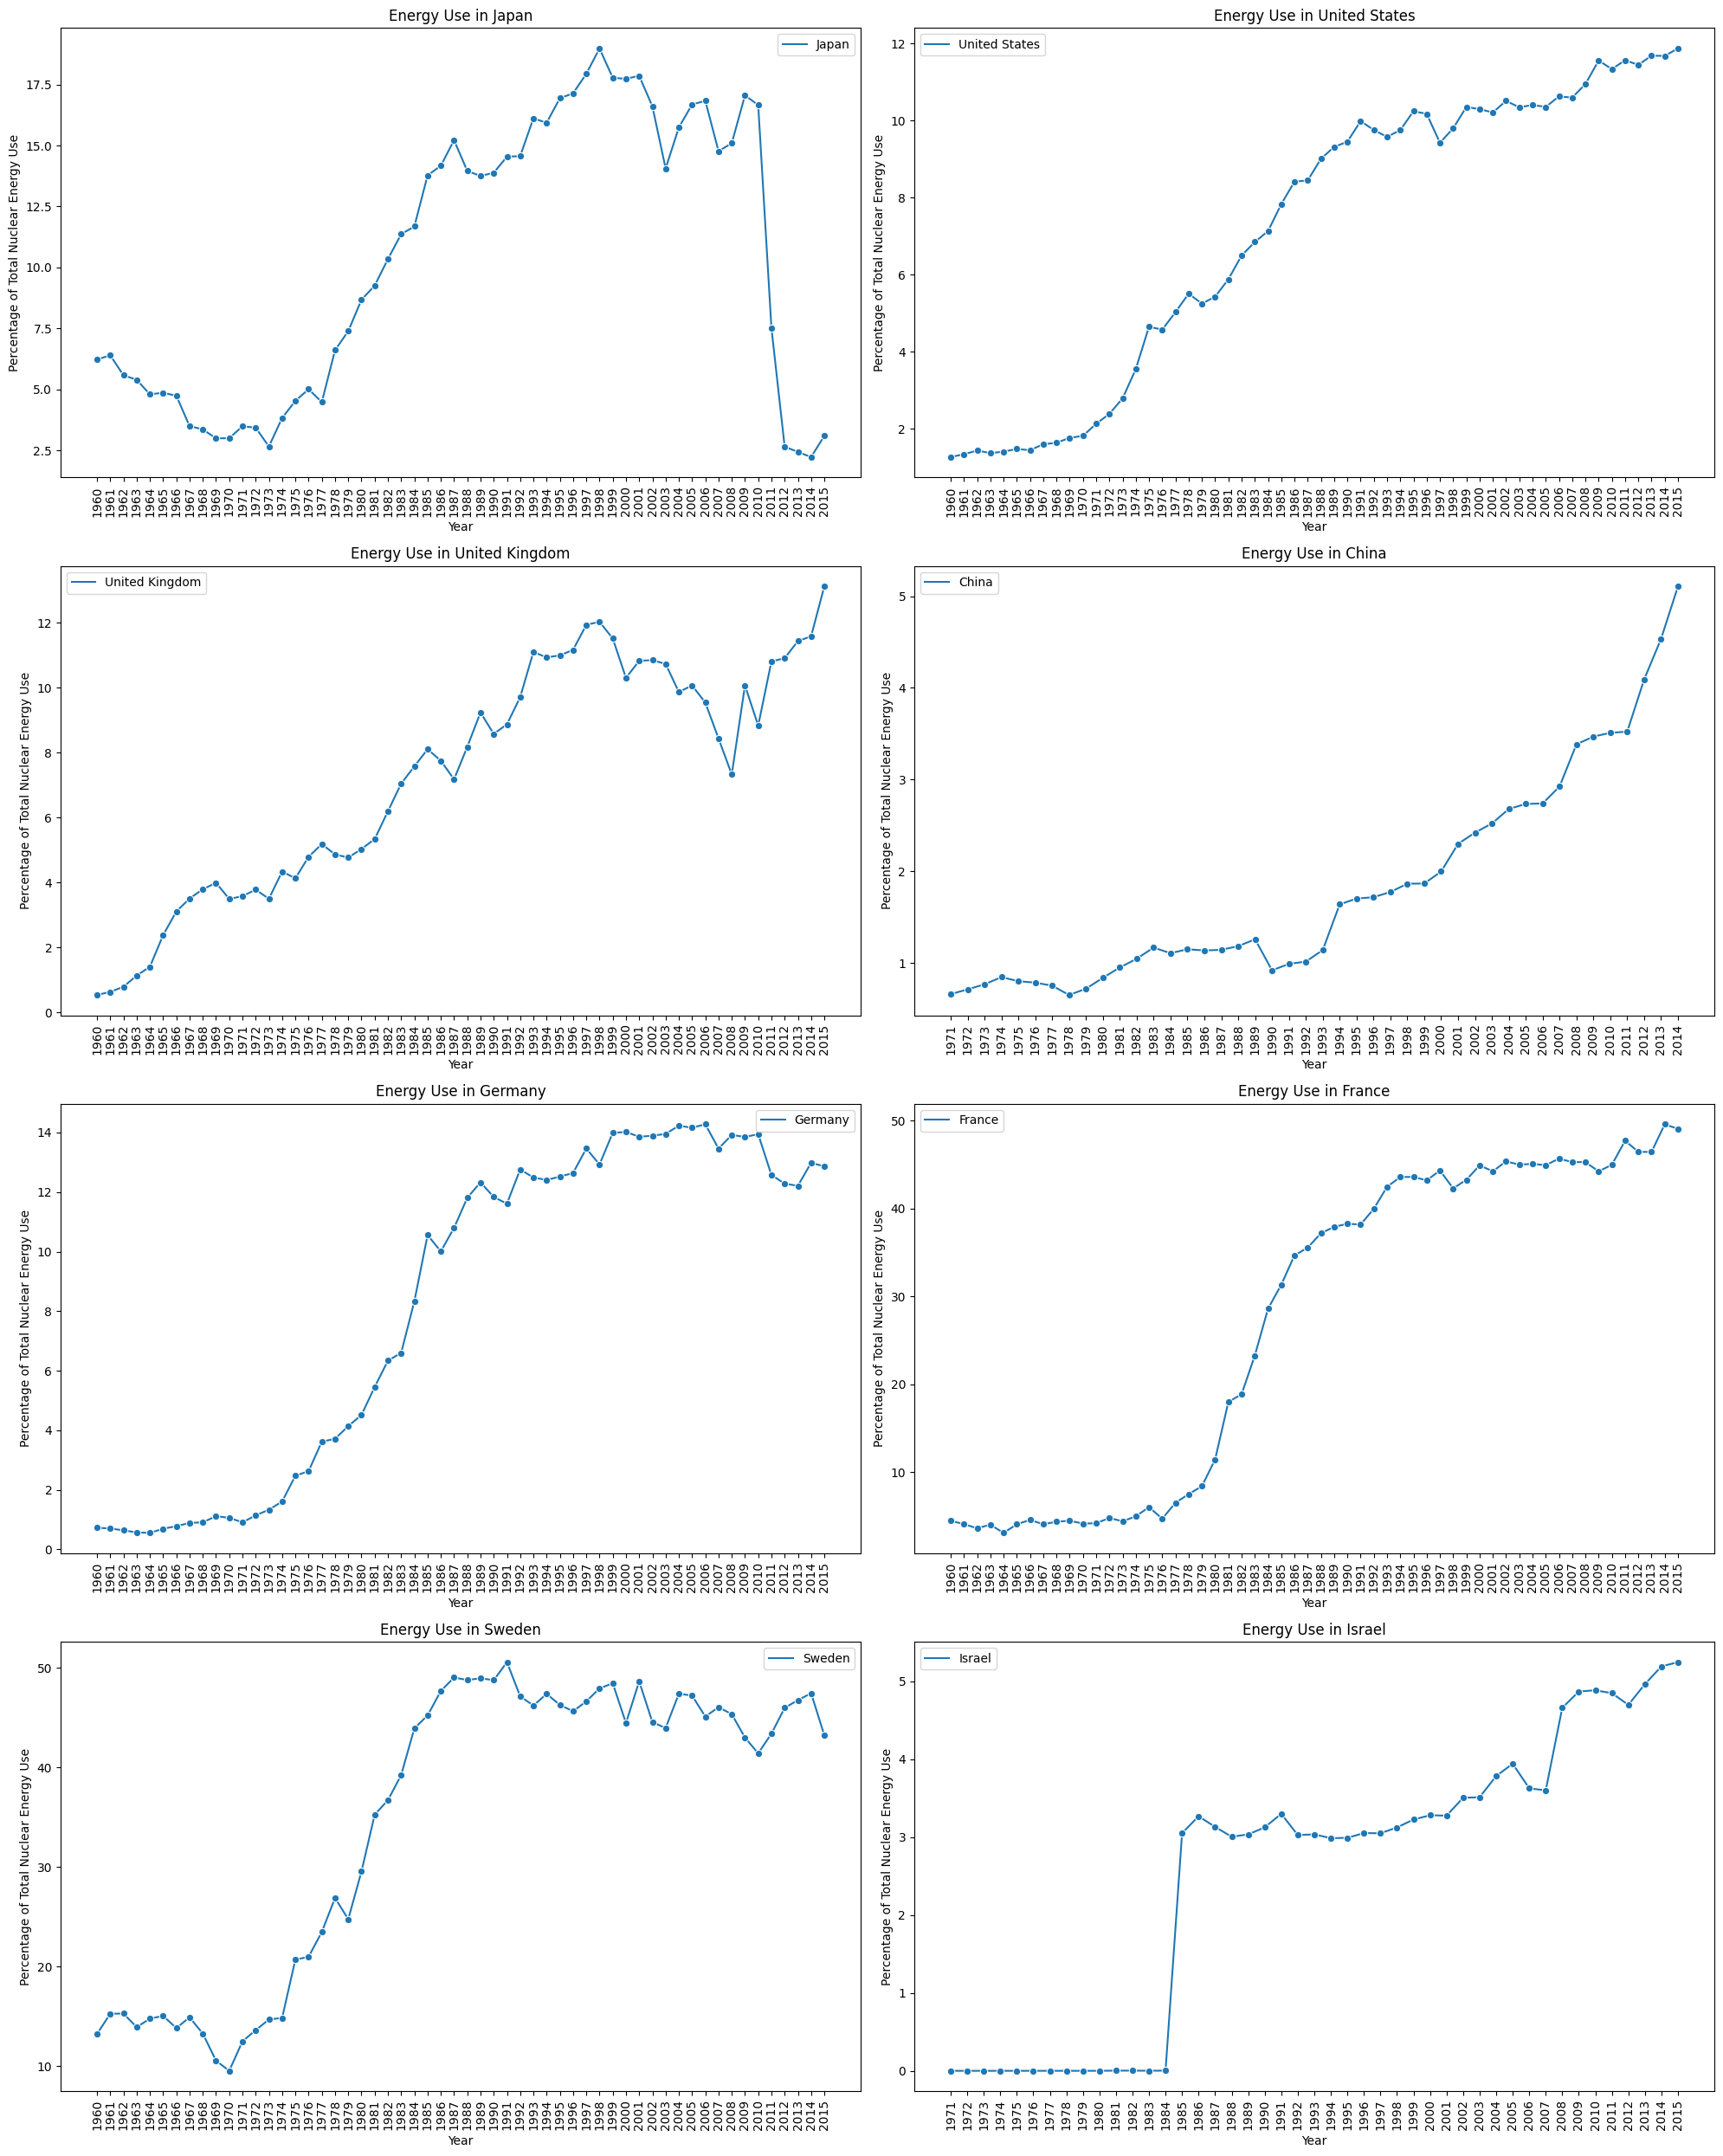

In [7]:
adjusted_countries = ['Japan', 'United States', 'United Kingdom', 'China', 'Germany', 'France', 'Sweden', 'Israel']

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for i, country in enumerate(adjusted_countries):
    country_data = df_energy[df_energy['Country Name'] == country]
    country_energy_years = country_data[year_columns].apply(pd.to_numeric, errors='coerce').T
    country_energy_years.columns = [country]
    country_energy_years.dropna(inplace=True)

    # Plot the data
    sns.lineplot(ax=axes[i], data=country_energy_years, marker='o')
    axes[i].set_title('Energy Use in ' + country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Total Nuclear Energy Use')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The following insights can be drawn from the above data:

- United states, United Kingdom, China and France showed positive growth in the nuclear energy consumption.

- Japan showed a major decrease in nuclear energy consumption, this might have happened due to the shutdown of the major nuclear plant.

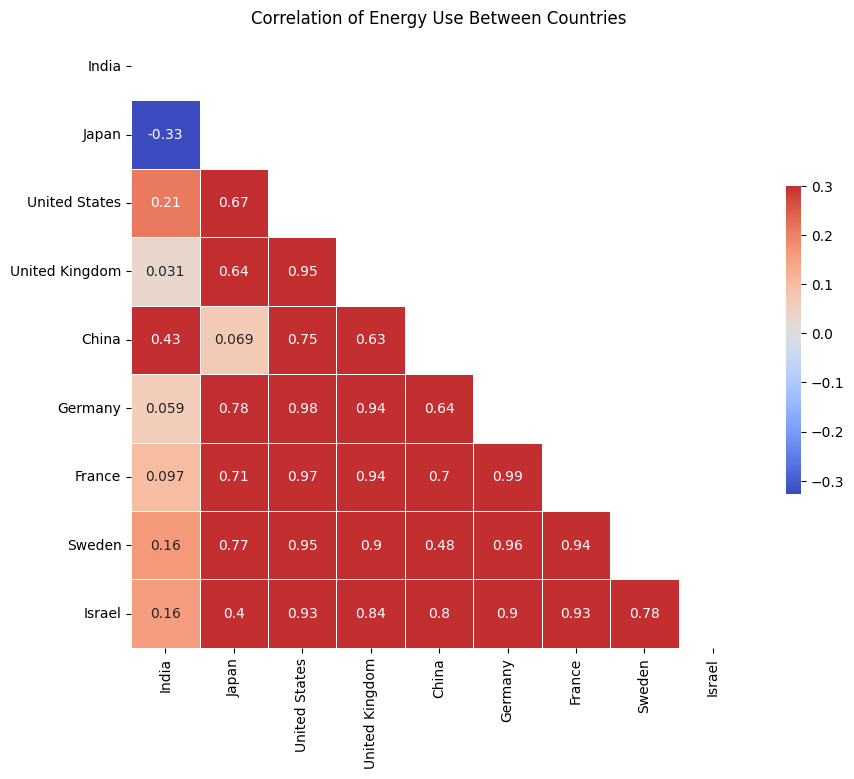

In [8]:
# Looking at the heat map, to find the correlation between the above countries

adjusted_countries = ['India', 'Japan', 'United States', 'United Kingdom', 'China', 'Germany', 'France', 'Sweden', 'Israel']

heatmap_data = pd.DataFrame(index=year_columns)

for country in adjusted_countries:
    country_data = df_energy[df_energy['Country Name'] == country]
    country_energy_years = country_data[year_columns].apply(pd.to_numeric, errors='coerce').T
    country_energy_years.columns = [country]
    heatmap_data = heatmap_data.join(country_energy_years, how='left')

# Drop any years with no data
heatmap_data.dropna(axis=0, how='all', inplace=True)

corr = heatmap_data.corr()  # Correlation Matrix

# mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation of Energy Use Between Countries')
plt.show()

There is a high correlation between some countries that suggest the two possibilities.

- There might be joint ventures between those countries.
- Or The growth rate of those contries might have been same.

In [9]:
import plotly.express as px

# Treemap for Regional Contribution
fig = px.treemap(
    df_energy_clean,   # Since we are plotting for the single year we are using the cleaned data
    path=['Country Name'],
    values='2015',
    title='Treemap for Regional Contribution',
    hover_data=['Country Name', '2015'],
    color='2015',
    color_continuous_scale='Viridis',
)

fig.show()

From the above data the following insights can be drawn:

- France was the major contributor to the total "Alternative and nuclear energy (% of total energy use)".

- France , Switzerland, Sweden, Iceland Norway and Solvenia where the major contibutors to the global total "Alternative and nuclear energy (% of total energy use)".

In [14]:
df_energy_global = df_energy.iloc[:, :-8]  # Since we have little or very less data after the year 2014
df_melted = pd.melt(df_energy_global, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Percentage')

# Stacked Area Chart for Global Trends
fig = px.area(
    df_melted,
    x='Year',
    y='Percentage',
    color='Country Name',
    title='Stacked Area Chart for Global Trends',
    labels={'Percentage': 'Alternative and nuclear energy (% of total energy use)'},
)

fig.show()

In [20]:
df_melted = pd.melt(df_energy_global, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Value')

# Animated Line Chart for Evolution
fig = px.line(
    df_melted,
    x='Year',
    y='Value',
    color='Country Name',
    animation_frame='Indicator Code',
    title='Animated Line Chart for Evolution',
    labels={'Value': 'Alternative and nuclear energy (% of total energy use)'},
)

fig.show()